In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Karthaus/karthaus_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 120300 × 4915
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'celltypes_group_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
mnp = sc.read_h5ad('dataset/Karthaus/karthaus_processed_mnp_ingested.h5ad')
mnp

AnnData object with n_obs × n_vars = 928 × 3000
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltype-immune'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PatientNum_colors', 'batch_colors', 'celltype-immune_colors', 'celltypes_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

In [4]:
lymphoid = sc.read_h5ad('dataset/Karthaus/karthaus_processed_lymphoid_annotated.h5ad')
lymphoid

AnnData object with n_obs × n_vars = 11159 × 4533
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
epi = sc.read_h5ad('dataset/Karthaus/karthaus_processed_epithelial_ingested.h5ad')
epi

AnnData object with n_obs × n_vars = 23754 × 21940
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltype'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PatientNum_colors', 'batch_colors', 'celltype_colors', 'celltypes_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

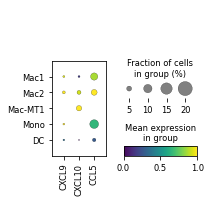

In [5]:
sc.pl.dotplot(mnp[~(mnp.obs['celltype-immune'] == 'Mac-cycling')], ['CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis', save = '/karthaus_mnp_dotplot.pdf')

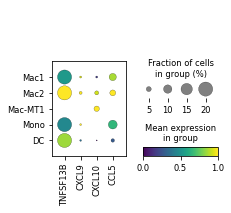

In [6]:
sc.pl.dotplot(mnp[~(mnp.obs['celltype-immune'] == 'Mac-cycling')], ['TNFSF13B', 'CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis', dot_max = .2, save = '/karthaus_mnp_dotplot.pdf')

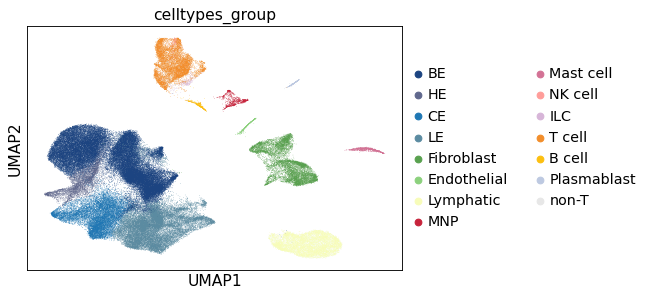

In [7]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(adata, color = 'celltypes_group', save = '/karthaus_all_umap.pdf')

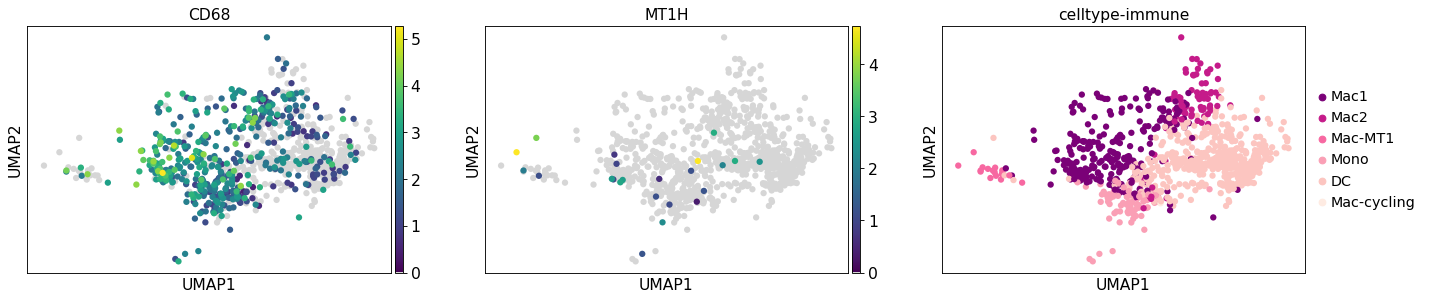

In [8]:
sc.pl.umap(mnp, color = ['CD68', 'MT1H', 'celltype-immune'], color_map = cmp(), save = '/karthaus_mnp_ingested_umap.pdf')

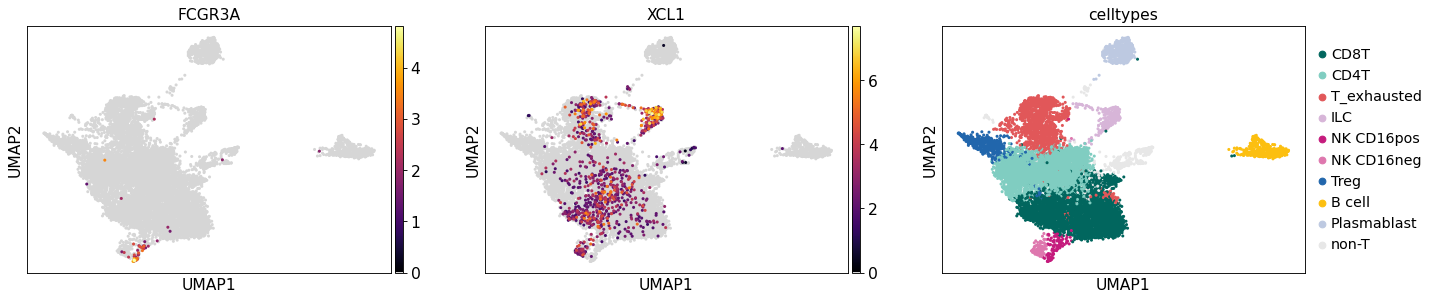

In [11]:
sc.pl.umap(lymphoid, color = ['FCGR3A', 'XCL1', 'celltypes'], color_map = cmp('inferno'), save = '/karthaus_NK_umap.pdf', size = 30)

In [4]:
adata.obs['label_transfer'] = pd.Series(epi.obs['celltype'])

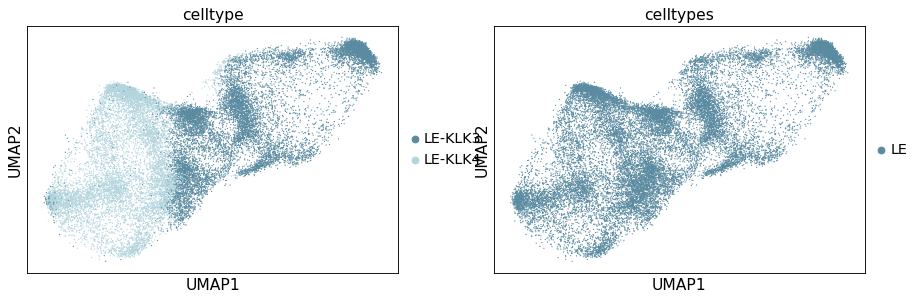

In [8]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(epi, color = ['celltype', 'celltypes'], save = '/karthaus_epi_ingested.pdf')

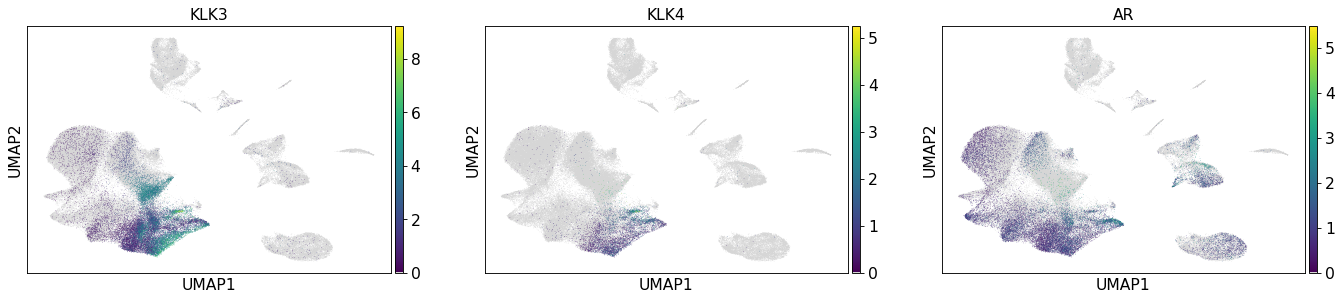

In [15]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(adata, color = ['KLK3', 'KLK4', 'AR'], color_map = cmp(), save = '/karthaus_KLK_umap.pdf')